# Decision Tree Regression


第一步：對N筆資料的每個feature做排序，所以會有M個排序好大小的feature sets <br>

第二步：針對每個排好的feature set，從第一筆開始，以現在這筆資料(含)以前當作left subtree，以後當作right subtree計算impurity <br>

第三部：取出impurity最低的那筆資料，並回傳t_left中標記資料y的平均和t_right中標記資料y的平均，拿來畫回歸線 <br>

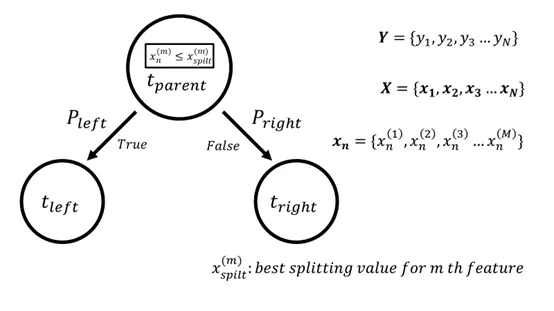

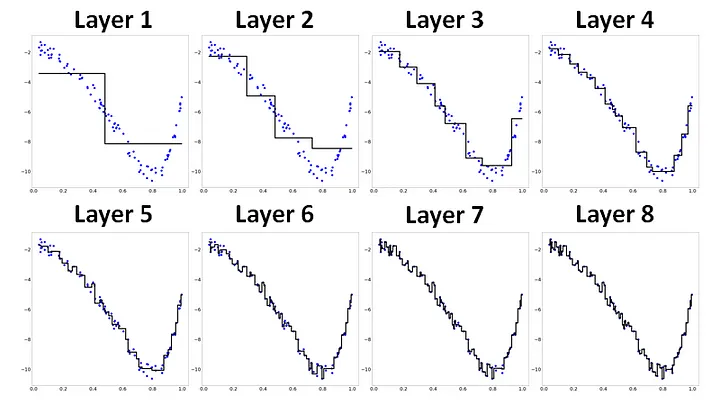


- 樹淺 -> bias 高, variance 低
- 樹深 -> bias 低, variance 高

## Importing the libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [45]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Decision Tree Regression model on the whole dataset

In [46]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

## Predicting a new result

In [47]:
regressor.predict([[6.5]])

array([150000.])

## Visualising the Decision Tree Regression results (higher resolution)

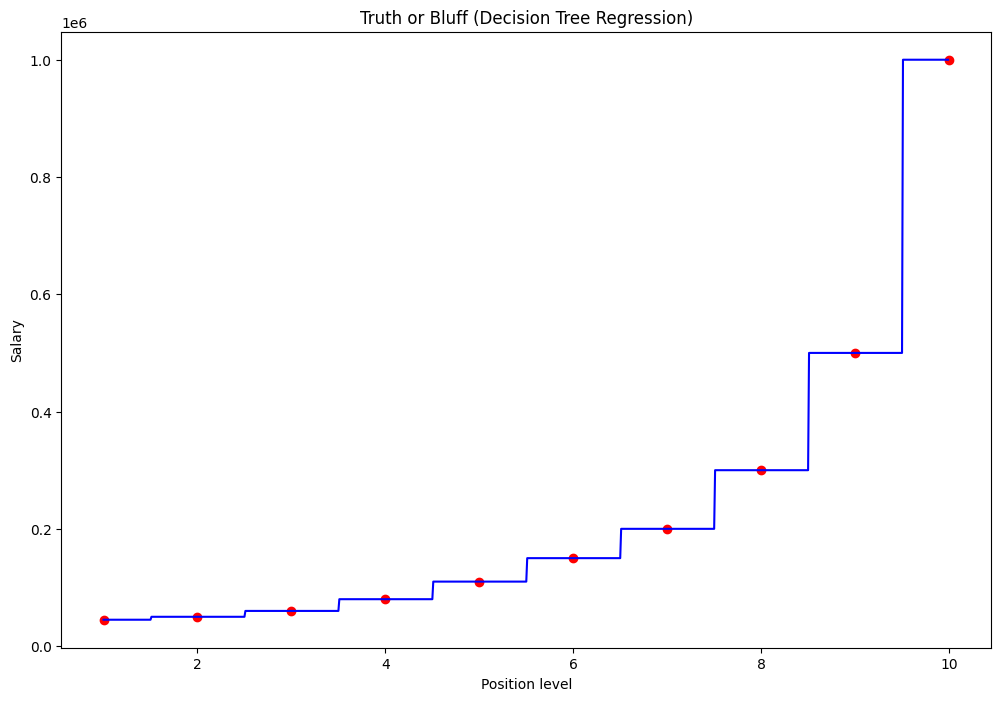

In [48]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## 研究討論

第一步：對N筆資料的每個feature做排序，所以會有M個排序好大小的feature sets <br>

第二步：針對每個排好的feature set，從第一筆開始，以現在這筆資料(含)以前當作left subtree，以後當作right subtree計算impurity <br>

第三部：取出impurity最低的那筆資料，並回傳t_left中標記資料y的平均和t_right中標記資料y的平均，拿來畫回歸線 <br>

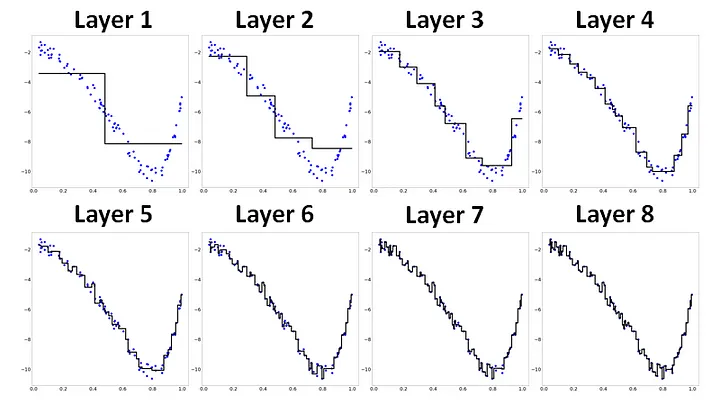
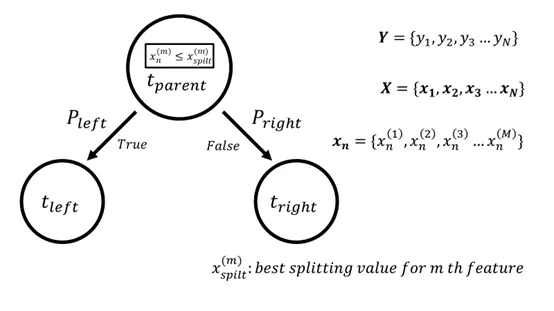


- 樹淺 -> bias 高, variance 低
- 樹深 -> bias 低, variance 高
  
當我們在使用決策樹回歸模型（Decision Tree Regressor）來進行數據分析時，我們會發現一個有趣的現象：隨著樹的深度增加，模型擬合數據的曲線變得更為複雜。這種複雜性雖然能夠讓模型在訓練集上達到很高的準確度，但同時也引起了嚴重的過度擬合（overfitting）問題。在樹的層次較淺時，模型又顯得過於粗糙，無法有效捕捉數據的真實趨勢。

這樣的特點可能會讓人質疑，為何決策樹回歸器仍然被廣泛應用。事實上，決策樹模型在特定條件下展示出非常好的性能。例如，當數據包含多種變化趨勢時，比如結合了二次函數和正弦函數的複合趨勢，決策樹回歸器能夠捕捉到這些複雜的非線性關係，從而提供相對較好的預測效果。

因此，雖然決策樹可能在某些簡單或標準化的數據集上表現不佳，它在處理具有複雜模式和多變趨勢的數據上卻有獨到之處。這也是為什麼許多分析師和數據科學家依然選擇使用決策樹作為他們工具箱中的一部分的原因。

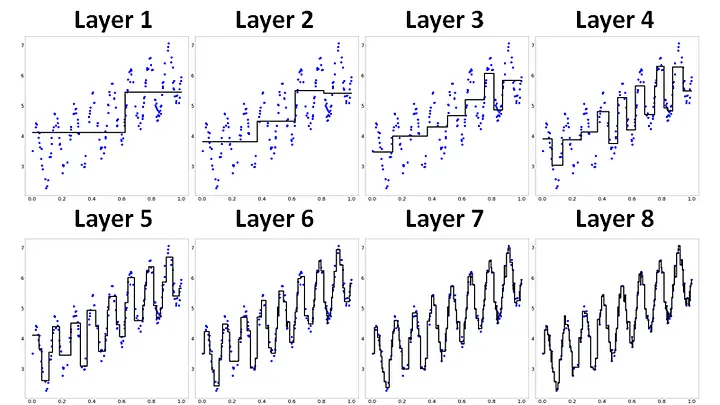

[ref](https://tomohiroliu22.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98%E7%B3%BB%E5%88%97-25-%E6%B1%BA%E7%AD%96%E6%A8%B9%E5%9B%9E%E6%AD%B8-decision-tree-regressor-ebab62eb24ea)

## 手刻 Decision Tree

In [49]:
import os 
import numpy as np
import random
import matplotlib.pyplot as plt

### Plot Decision Line

In [50]:
def plot_line(x_split,y_left_mean,y_right_mean,x_lim,sel):
    # x_split:分割線
    # y_left_mean：分割線縱軸的最小值
    # y_right_mean：分割線縱軸的最大值
    # xlim:分割線的橫軸邊界
    
    # sel=0-->當subtree左右兩邊都已經剩下一筆資料，或是到達所限制的最大層數
    if(sel==0):
        plt.plot([x_split,x_split],[y_left_mean,y_right_mean],'k',linewidth=2)
        plt.plot([x_lim[0],x_split],[y_left_mean,y_left_mean],'k',linewidth=2)
        plt.plot([x_split,x_lim[1]],[y_right_mean,y_right_mean],'k',linewidth=2)
    # sel=1-->當subtree建立時
    elif(sel==1):
        plt.plot([x_split,x_split],[y_left_mean,y_right_mean],'k',linewidth=2)
    # sel=2-->當右邊的subtree只剩下一筆資料
    elif(sel==2):
        plt.plot([x_split,x_lim[1]],[y_right_mean,y_right_mean],'k',linewidth=2)
    # sel=2-->當左邊的subtree只剩下一筆資料
    elif(sel==3):
        plt.plot([x_lim[0],x_split],[y_left_mean,y_left_mean],'k',linewidth=2)

### Mean Square Error

In [51]:
def MSE(s,y):
    # 這個方程式對應到文章中的Mean Square Error
    # s:subtree裡面所有的index
    com=sum((y[s]-np.mean(y[s]))**2)
    return com

### Decision Stump

In [52]:
def Decision_Stump(x,y):
    # 存放impurity候選值
    impurity=np.zeros(len(y)-1)
    # 對x排序
    x_sort=np.sort(x)
    # 儲存排序後x的index
    x_sort_index=np.argsort(x)
    # 計算每一種切割方式的impurity值
    for i in range(1,len(y)):
        s_left,s_right=x_sort_index[:i],x_sort_index[i:]
        impurity[i-1]=(len(s_left)/len(y))*MSE(s_left,y)+(len(s_right)/len(y))*MSE(s_right,y)
    x_split=(x_sort[np.argmin(impurity)]+x_sort[np.argmin(impurity)+1])/2
    # 回傳分割值和impurity值
    return x_split,min(impurity)



### Decision Tree Algorithms

In [53]:
def Decision_Tree(x,y,max_depth,x_lim):
    # 執行decision_stump找出最佳分割線
    x_split,impurity=Decision_Stump(x,y)
    # 切分我們的數據，這裡可以對應到b(x)
    p=x<x_split
    # 建立左邊和右邊的subtree
    x_left,y_left=x[p],y[p]
    x_right,y_right=x[~p],y[~p]
    # 建立我們畫回歸線的區間
    x_lim_left=np.zeros(2)
    x_lim_right=np.zeros(2)
    x_lim_left[0],x_lim_left[1]=x_lim[0],x_split
    x_lim_right[0],x_lim_right[1]=x_split,x_lim[1]
    # 檢查左右兩邊subtree是否只剩下一筆
    check_left,check_right=False,False
    if(len(y_left)==1):
        check_left=True
    if(len(y_right)==1):
        check_right=True
    # decision tree 停止條件
    # 1. impirity=0 / 2. 達到最大深度 / 3.左右兩邊都只剩下一筆資料
    if((impurity==0)or(max_depth==0)or((check_left)and(check_right))):
        plot_line(x_split,np.mean(y_left),np.mean(y_right),x_lim,0)
        return np.mean(y_left),np.mean(y_right)
    # 左邊分類好的話，就只延伸右邊的subtree
    elif(check_left):
        max_depth-=1
        right_y_left,right_y_right=Decision_Tree(x_right,y_right,max_depth,x_lim_right)
        plot_line(x_split,np.mean(y_left),right_y_left,x_lim,1)
        plot_line(x_split,np.mean(y_left),right_y_left,x_lim,3)
        return np.mean(y_left),right_y_right
    # 右邊分類好的話，就只延伸左邊的subtree
    elif(check_right):
        max_depth-=1
        left_y_left,left_y_right=Decision_Tree(x_left,y_left,max_depth,x_lim_left)
        plot_line(x_split,left_y_right,np.mean(y_right),x_lim,1)
        plot_line(x_split,left_y_right,np.mean(y_right),x_lim,2)
        return left_y_left,np.mean(y_right)
    # 兩邊的subtree都延伸
    else:
        max_depth-=1
        left_y_left,left_y_right=Decision_Tree(x_left,y_left,max_depth,x_lim_left)
        right_y_left,right_y_right=Decision_Tree(x_right,y_right,max_depth,x_lim_right)
        plot_line(x_split,left_y_right,right_y_left,x_lim,1)
        return left_y_left,right_y_right

### 多項式回歸用 decision tree regression 擬合
會發現擬合結果非常好但 variance 很不穩

In [56]:
# p0~p9代表0次到9次方
p9,p8,p7,p6,p5,p4,p3,p2,p1,p0=1,3,5,7,9,-10,-8,-6,-4,-2
x=np.zeros(100)
y=np.zeros(100)
# 隨機產生數據點
for i in range(0,len(x)):
    x[i]+=random.random() 
    y[i]+=random.random() # 常數項

power=[p9,p8,p7,p6,p5,p4,p3,p2,p1,p0]
for i in range(0,len(power)):
    y+=power[len(power)-i-1]*(x**i) # y = p9*x^9 + p8*x^8 + ... + p0 + b

y

array([ -1.17673074,  -8.89002352,  -7.01122226, -10.05259814,
        -9.12583526,  -9.83111711,  -7.15015047,  -1.97140605,
        -2.9202826 ,  -2.06229807,  -2.10318791,  -6.63417184,
        -2.32151821,  -3.50052418, -10.28372679,  -6.98931683,
        -5.58132315,  -3.59589233,  -4.14903499,  -2.443948  ,
        -2.93703679,  -3.64062347,  -2.06272681,  -9.98926304,
        -6.57496037, -10.532255  ,  -3.61856636,  -5.22224058,
        -9.46593094,  -4.91952561,  -2.38586556,  -3.18080251,
        -3.11525252,  -8.66176647,  -8.72511034,  -1.78013872,
        -6.520686  ,  -3.28447224,  -6.49473465,  -3.96016222,
        -4.53615191,  -3.49815637,  -8.10495606,  -3.75865877,
        -9.8888091 ,  -1.44418635,  -8.49805022,  -2.03712457,
        -5.1270237 ,  -4.56243825,  -6.65573281,  -1.35744166,
        -8.36613774,  -9.99534504,  -2.6656538 ,  -7.49999964,
        -3.90144024,  -3.2689668 ,  -1.2786318 ,  -4.68125378,
        -8.71929833,  -6.15233621,  -2.58219691,  -8.09

### Visualize

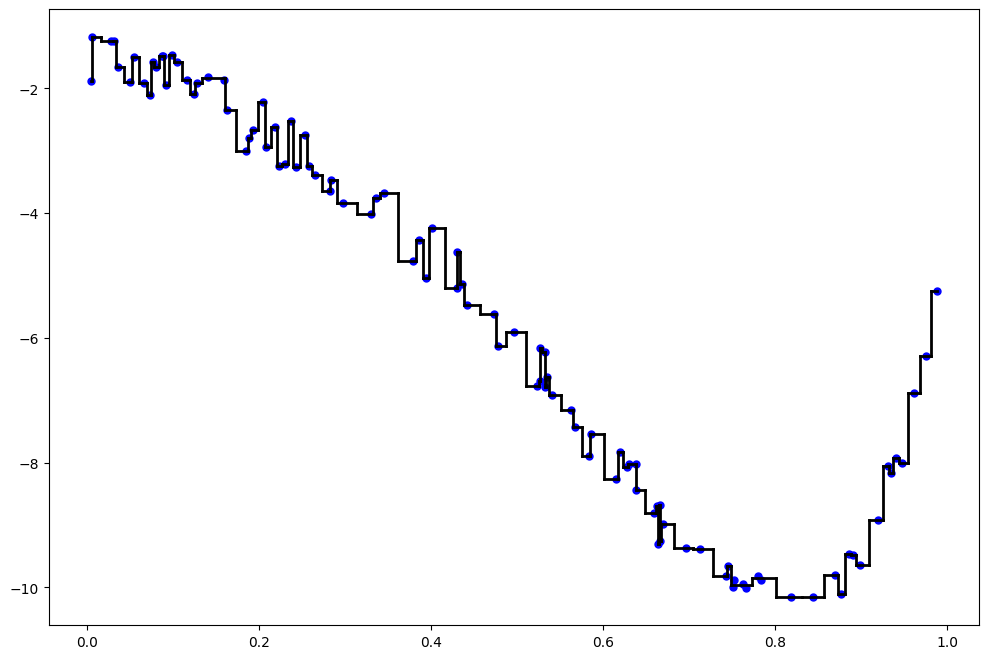

In [55]:

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(x,y,"bo",markersize=5, linewidth=2)
x_lim=np.zeros(2)
x_lim[0],x_lim[1]=min(x),max(x)
L,R=Decision_Tree(x,y,7,x_lim)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Sin and Cos function

若遇到波型由多種潛在線型所構成，decision tree regression 相較於 polynomial regression 會是不錯的選擇

In [58]:
# p0~p9代表0次到9次方
p2,p1,p0=1,2,3
x=np.zeros(200)
y=np.zeros(200)
# 隨機產生數據點
for i in range(0,len(x)):
    x[i]+=random.random()
    y[i]+=random.random()*0.5
power=[p2,p1,p0]
for i in range(0,len(power)):
    y+=power[len(power)-i-1]*(x**i)
y+=np.sin(x*50)

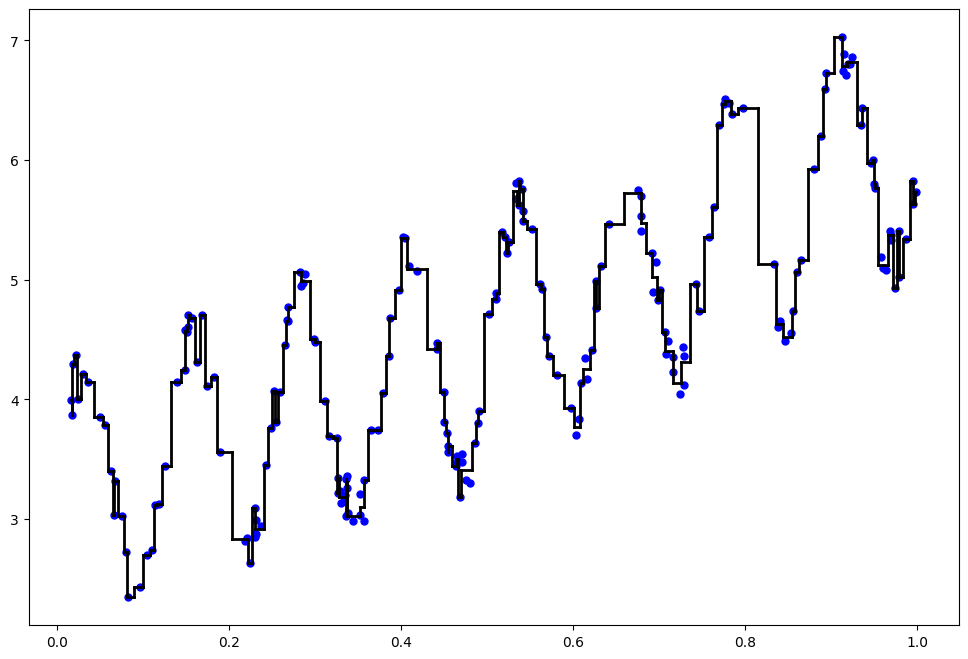

In [62]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(x,y,"bo",markersize=5, linewidth=2)
x_lim=np.zeros(2)
x_lim[0],x_lim[1]=min(x),max(x)
L,R=Decision_Tree(x,y,7,x_lim)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

